## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation

In [3]:
# load data
df_customer = pd.read_csv('../dataset/Case Study - Customer.csv', delimiter=';')
df_transaction = pd.read_csv('../dataset/Case Study - Transaction.csv', delimiter=';')

In [4]:
# merge data
merged_df = pd.merge(df_transaction, df_customer, on='CustomerID', how='left')
merged_df

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,44,1,Married,"14,58"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,27,1,Single,"0,18"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,48,1,Married,"12,57"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,33,0,Married,"6,95"
...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3,38,0,Married,"3,34"
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9,29,0,Married,"4,74"
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9,37,0,Married,"3,73"
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13,47,0,Married,"13,6"


In [5]:
# convert date to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%Y')

# fill missing values
merged_df['Marital Status'] = merged_df['Marital Status'].fillna(method='ffill')

# convert categorical data to numerical
merged_df['Marital Status'] = merged_df['Marital Status'].apply(lambda x: 1 if x == 'Married' else 0)

# convert income to float
merged_df['Income'] = merged_df['Income'].apply(lambda x: x.replace(',', '.')).astype(float)

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   int64         
 11  Income          5020 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 470.8+ KB


In [7]:
merged_df

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,1,10.53
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,1,14.58
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,0,0.18
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,1,12.57
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,1,6.95
...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR54423,243,2022-12-31,P10,15000,5,75000,3,38,0,1,3.34
5016,TR5604,271,2022-12-31,P2,3200,4,12800,9,29,0,1,4.74
5017,TR81224,52,2022-12-31,P7,9400,6,56400,9,37,0,1,3.73
5018,TR85016,18,2022-12-31,P8,16000,3,48000,13,47,0,1,13.60


## Clustering Analysis

In [8]:
# create new dataframe
agg = {
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}

cluster_df = merged_df.groupby('CustomerID').aggregate(agg).reset_index()
cluster_df

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


### Data Scaling

In [9]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cluster_df[['TransactionID', 'Qty', 'TotalAmount']])
scaled_df = pd.DataFrame(scaled_df, columns=['TransactionID', 'Qty', 'TotalAmount'])
scaled_df

,TransactionID,Qty,TotalAmount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347
...,...,...,...
442,1.471333,1.418049,0.984681
443,2.088298,1.653484,1.728488
444,2.088298,2.124352,1.804796
445,-0.071082,0.083921,0.488275


### Modelling with KMeans

In [14]:
# build model with kmeans
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

wcss = []
for n in range(1,11):
    model1 = KMeans(
        n_clusters=n, 
        init='k-means++',
        max_iter=100,
        tol=0.0001,
        random_state=100
        )
    model1.fit(scaled_df)
    wcss.append(model1.inertia_)
print(wcss)

[1341.0000000000002, 543.2539723846328, 316.9717123222516, 238.5531321641924, 192.16713152981617, 169.7845616020577, 153.8492948432472, 141.49693998928464, 129.99813774709875, 122.54043730511752]


### Plot Model

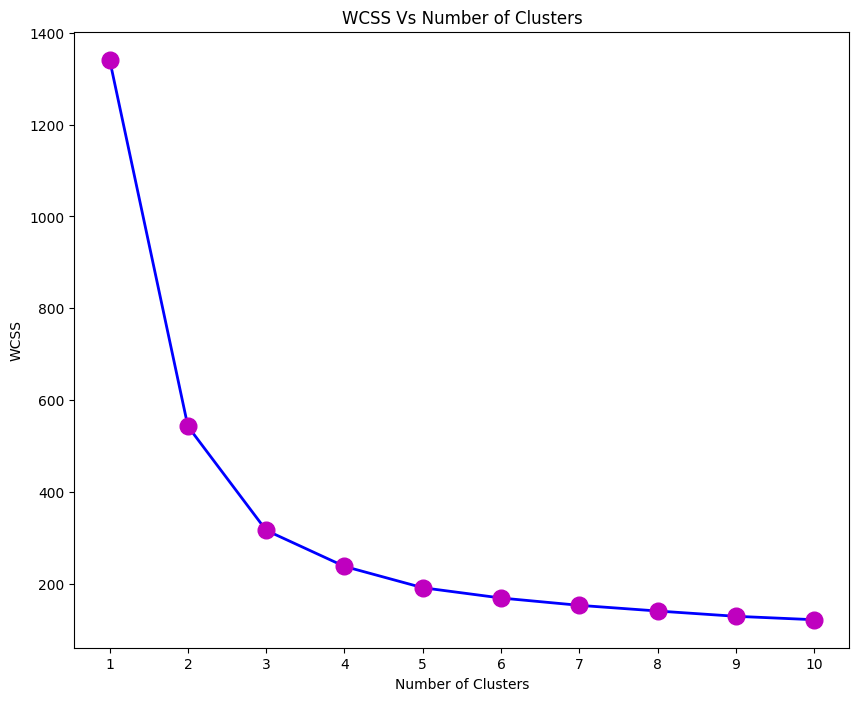

In [16]:
# plot model to find optimal number of clusters

plt.figure(figsize=(10,8))
plt.plot(list(range(1,11)), wcss, color='blue', marker='o', linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('WCSS Vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.show()

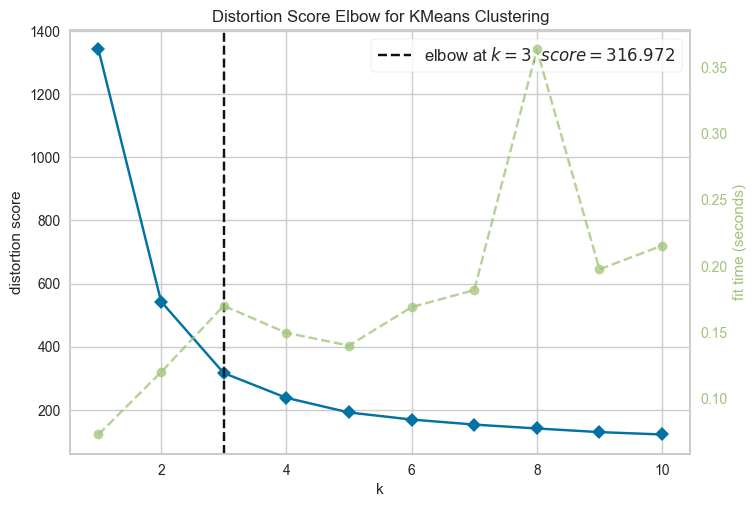

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# visualize elbow method to find optimal number of clusters

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model1, k=(1,11))
visualizer.fit(scaled_df)
visualizer.show()

### The Best Cluster

In [37]:
kmeans_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=100)
kmeans_3.fit(cluster_df)

KMeans(n_clusters=3, n_init=10, random_state=100)

In [39]:
# add cluster to dataframe
cluster_df['cluster'] = kmeans_3.labels_
cluster_df = cluster_df.drop('CustomerID', axis=1)
cluster_df

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,0
1,13,57,392300,2
2,15,56,446200,2
3,10,46,302500,1
4,7,27,268600,1
...,...,...,...,...
442,16,59,485100,0
443,18,62,577700,0
444,18,68,587200,0
445,11,42,423300,2


<Figure size 600x600 with 0 Axes>

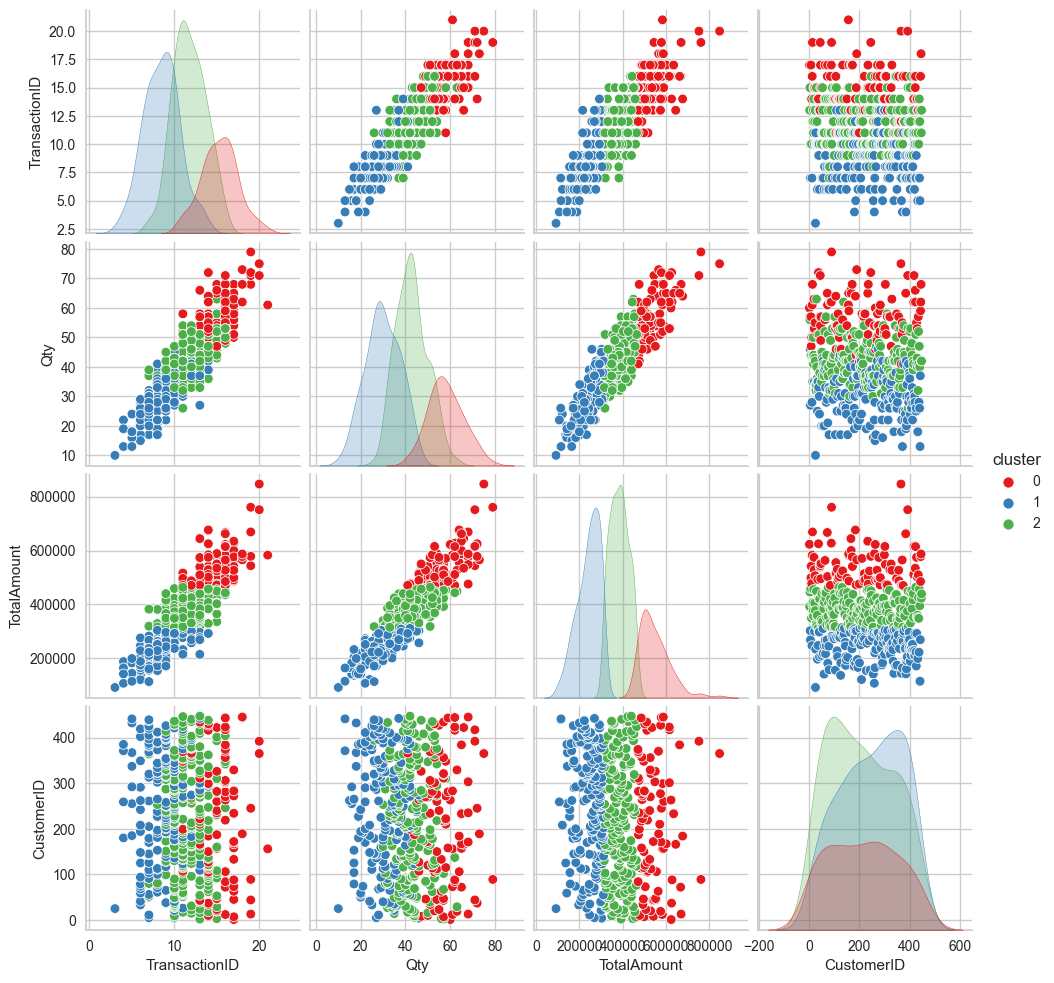

In [44]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.pairplot(data= cluster_df,hue='cluster',palette='Set1')
plt.show()

In [51]:
cluster_df['CustomerID'] = df_customer['CustomerID']
cluster_df_mean = cluster_df.groupby('cluster').agg({'CustomerID':'count','TransactionID':'mean','Qty':'mean','TotalAmount':'mean'})
cluster_df_mean.sort_values('CustomerID', ascending=False).astype(int)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
2,187,11,42,383620
1,170,8,29,241008
0,90,15,58,548162
